# House Price Prediction Advance

**Business Probem :** Create a model which Preditct the prise of House

Dataset available at [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

(Note:Description from Kaggle)
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

**Dataset Information:** 
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale

Now lets get start with Regression Problem

In [3]:
##Import libraries
#Basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as py
import seaborn as sns
import scipy
from scipy import stats
import warnings

#Sklearn library for ML
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

#Ensembles
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
warnings.filterwarnings('ignore')

## EDA

1. Import the required libary basic and sklearn
2. Load the dataset from train.csv (Where we need to train our Machine learning model) & test.csv (on this we need to predict our actual results)
3. Lets print first and last 10 rows of dataset and take a rough look over & have some basic understanding about dataset
4. Dataset contail mixed datatype like int, float, datetime & categorical
5. looks like dataset is containing missing value also

let's get deeper into Analysis

In [5]:
#Load data from file
pd.options.display.max_columns = None
dt_train=pd.read_csv('train.csv',sep=',')
dt_main=pd.read_csv('test.csv',sep=',')

dt_train.head(5)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
dt_train.tail(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [7]:
#Understand numerical data with describe
dt_train.describe(include='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count     91     1460        1460      1460      1460      1460         1460   
unique     2        4           4         2         5         3           25   
top     Grvl      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq      50      925        1311      1459      1052      1382          225   
mean     NaN      NaN         NaN       NaN       NaN       NaN          NaN   
std      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
min      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
25%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
50%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
75%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
max      NaN      NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1460       1460     1460       1460  1460.000000  1460.000000   
unique          9          8        5          8          NaN          NaN   
top          Norm       Norm     1Fam     1Story          NaN          NaN   
freq         1260       1445     1220        726          NaN          NaN   
mean          NaN        NaN      NaN        NaN     6.099315     5.575342   
std           NaN        NaN      NaN        NaN     1.382997     1.112799   
min           NaN        NaN      NaN        NaN     1.000000     1.000000   
25%           NaN        NaN      NaN        NaN     5.000000     5.000000   
50%           NaN        NaN      NaN        NaN     6.000000     5.000000   
75%           NaN        NaN      NaN        NaN     7.000000     6.000000   
max           NaN        NaN      NaN        NaN    10.000000     9.000000   

          YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
count   1460.000000   1460.000000      1460     1460        1460        1460   
unique          NaN           NaN         6        8          15          16   
top             NaN           NaN     Gable  CompShg     VinylSd     VinylSd   
freq            NaN           NaN      1141     1434         515         504   
mean    1971.267808   1984.865753       NaN      NaN         NaN         NaN   
std       30.202904     20.645407       NaN      NaN         NaN         NaN   
min     1872.000000   1950.000000       NaN      NaN         NaN         NaN   
25%     1954.000000   1967.000000       NaN      NaN         NaN         NaN   
50%     1973.000000   1994.000000       NaN      NaN         NaN         NaN   
75%     2000.000000   2004.000000       NaN      NaN         NaN         NaN   
max     2010.000000   2010.000000       NaN      NaN         NaN         NaN   

       MasVnrType   MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
count        1452  1452.000000      1460      1460       1460     1423   
unique          4          NaN         4         

In [8]:
print(dt_train.shape)
print(dt_main.shape)

(1460, 81)
(1459, 80)


### Missing value 

1. Lets first create copy of both the dataset so that we can make changes on it and it will not original dataset
2. it's look like in train and test dataset , there are missing values
3. we will divide it into category like , feauture which has missing value more than 50% and other missing values
4. We will delete the feauture which has missing value more than 50%


In [9]:

dt_test=dt_main.copy()
dt_copy=dt_train.copy()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

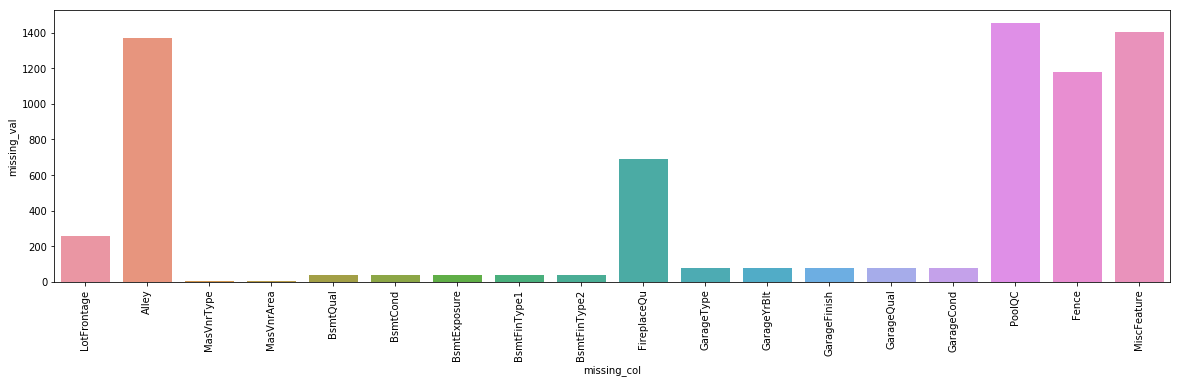

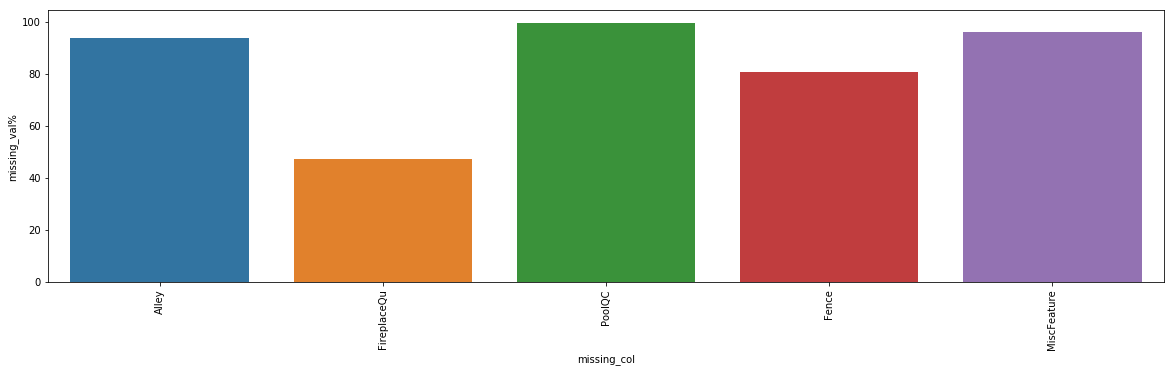

In [10]:
#Find out the missing values
miss_test=dt_test.isnull().sum()
print(miss_test)
print("---------------------------------Below are missing value for Train dataset-------------------------------------")
miss=dt_copy.isnull().sum()
missval=dt_copy.isnull().sum()/len(dt_copy)*100

var1=dt_copy.columns
var2=[]
var3=[]
miss1=[]
miss2=[]

for i in range(0,80):
    if miss[i]>1:
        var3.append(var1[i])
        miss2.append(miss[i])


for i in range(0,80):
    if missval[i]>45:
        var2.append(var1[i])
        miss1.append(missval[i])


frame={'missing_col':var3,'missing_val':miss2}
frame1=pd.DataFrame(frame,columns=['missing_col','missing_val'])

py.figure(figsize=(20,5))
py.xticks(rotation=90)
sns.barplot(x='missing_col',y='missing_val',data=frame1)
py.show()

frame={'missing_col':var2,'missing_val%':miss1}
frame2=pd.DataFrame(frame,columns=['missing_col','missing_val%'])

py.figure(figsize=(20,5))
py.xticks(rotation=90)
sns.barplot(x='missing_col',y='missing_val%',data=frame2)
py.show()

1. we will create method which delete the columns whose missing value is ore than 50 %
2. method drop_columns() will do that wotk for us.


In [11]:
class delete():
    def __init__(self):
        print("object has created")
        
    def drop_columns(self,data):
        '''it will drop the feutures which has missing value more than 50%'''
        data.drop(['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','GarageYrBlt'],axis=1,inplace=True)
        return data
    




In [12]:
drop1=delete()
dt_copy=drop1.drop_columns(dt_copy)

object has created


In [13]:
test_id=dt_test['Id']
drop2=delete()
dt_test=drop2.drop_columns(dt_test)

object has created


1. This method missing_val_handle() will handle the replacing misssing value with particular feature with most common category or mean of that feauture and handle nan value also
2. after replacing all value , now we have dataset of (1460, 74) (1457, 73) .


In [14]:
class analysis():
    
    def __init__(self):
        print("class object has created")
    
    
    def missing_val_handle(self,data):

        value={'LotFrontage':69,'BsmtQual':'TA','BsmtCond':'TA','BsmtExposure':'No','BsmtFinType1':'Unf','BsmtFinType2':'Uft','GarageType':'Attchd','GarageFinish':'Unf','GarageQual':'TA','GarageCond':'TA','Electrical':'SBrkr','MasVnrType':'chr','MasVnrArea':103,'MSZoning':'RL','Utilities':'AllPub','Exterior1st':'VinylSd','Exterior2nd':'VinylSd','KitchenQual':'TA','Functional':'Typ','GarageCars': 1,'GarageArea': 472.98,'SaleType': 'Normal'}
        data.fillna(value=value,inplace=True)
        data.replace('NaN','None',inplace=True)
        data.replace('nan','None',inplace=True)
        return data


#value={'LotFrontage':69,'BsmtQual':'TA','BsmtCond':'TA','BsmtExposure':'No','BsmtFinType1':'Unf','BsmtFinType2':'Uft','GarageType':'Attchd','GarageFinish':'Unf','GarageQual':'TA','GarageCond':'TA','Electrical':'SBrkr','MasVnrType':'chr','MasVnrArea':103}
#dt_copy.fillna(value=value,inplace=True)
#dt_copy.replace('NaN','None')

In [15]:
delete=analysis()
delete1=analysis()
dt_copy=delete.missing_val_handle(dt_copy)
dt_test=delete1.missing_val_handle(dt_test)
dt_test.dropna(inplace=True,axis=0)

class object has created
class object has created


In [16]:
print(dt_copy.shape)
print(dt_test.shape)

(1460, 74)
(1457, 73)


## Visulization

1. with histogram , let's analyze the numbers feature and it's distribution.
2. from below histogram it's look like , data is not distrubuted symmetrically and range of data is also different
3. to check that, we will look into skewness of Data

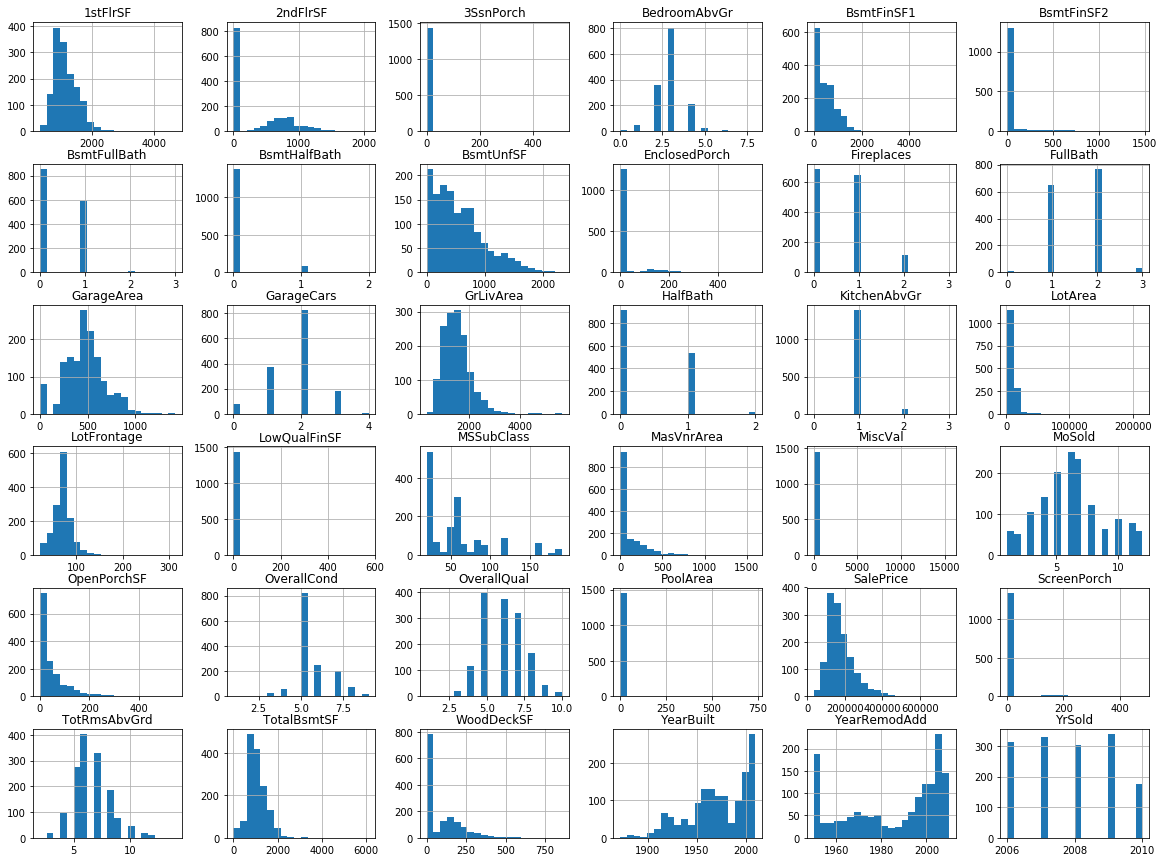

In [17]:
dt_copy.hist(bins=20, figsize=(20, 15))
py.show()

1. to understand relation between each feuture, lets find the pearson correlation in between of them.
2. below heatmap is showing thew relation between the features.
3. some of the feature has correlation more than 80% , means they have strong relation , so we will keep only one of them.

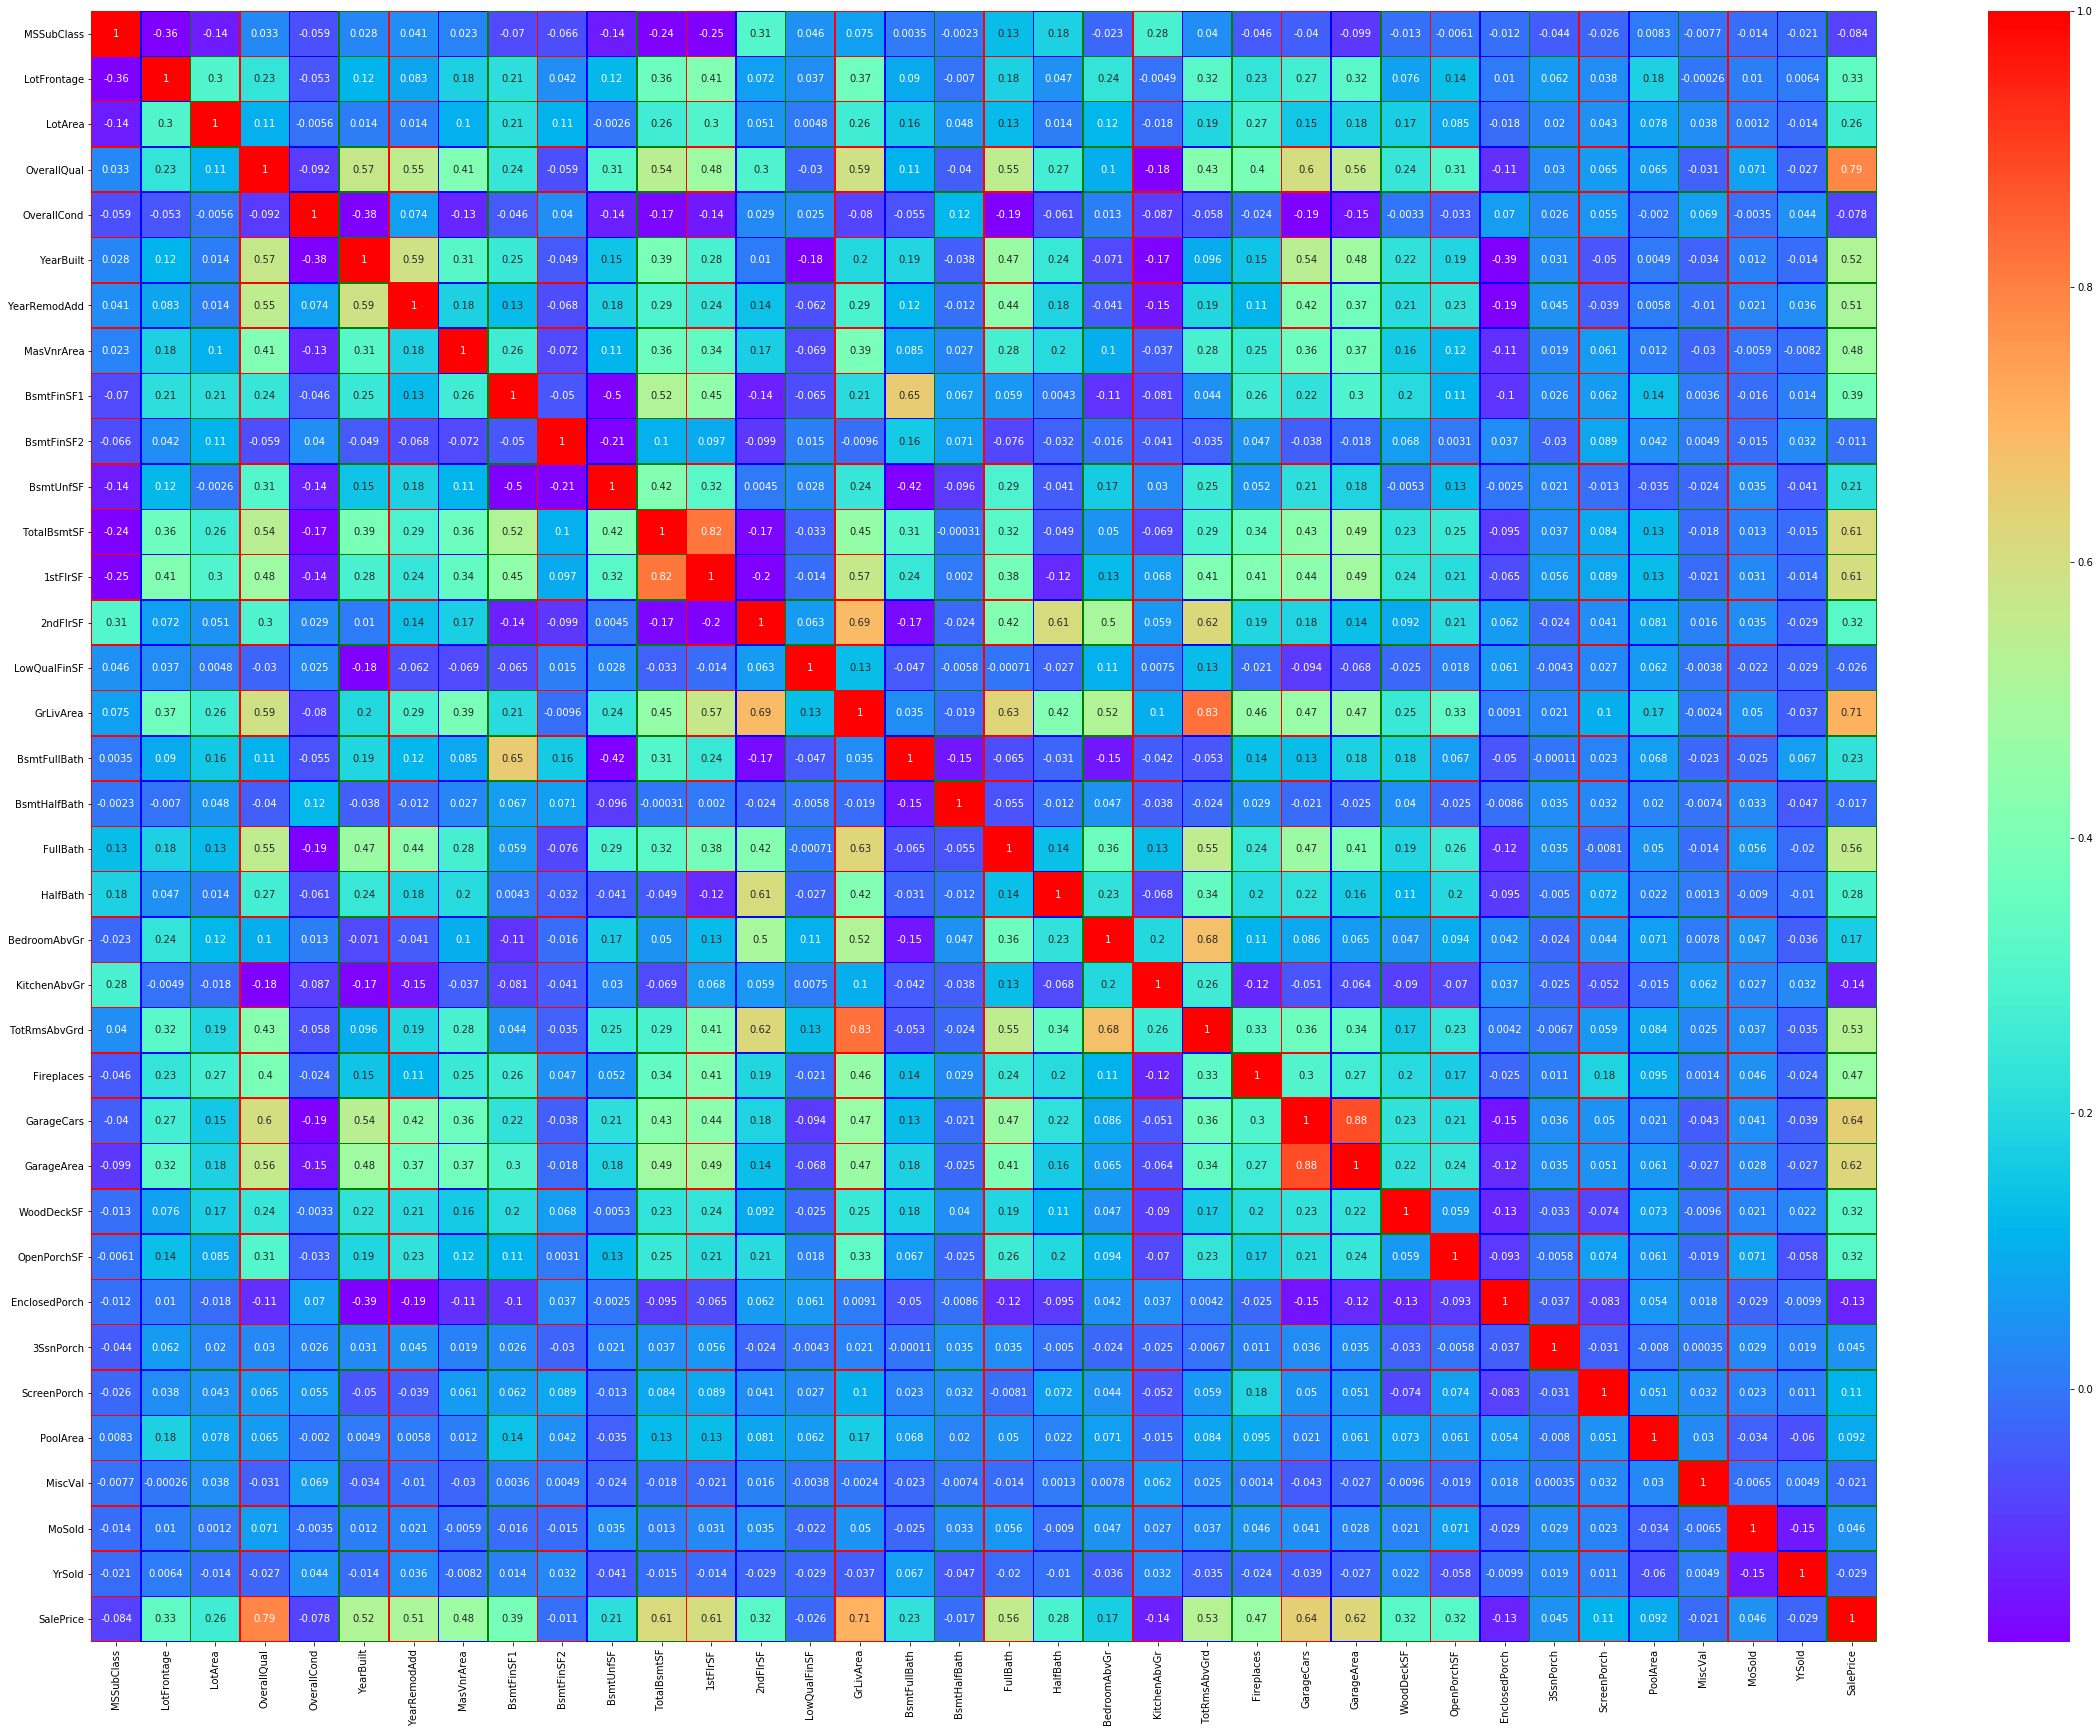

In [18]:
dt_corr=dt_copy.corr()
dt_corr1=[]
py.figure(figsize=(40,30))
sns.heatmap(dt_corr,linewidth=0.5,cmap="rainbow",annot=True,robust=True,linecolor="rbg")
py.show()

1. To understand the mostly correlated feature with respect to target , we need to understand with by below pairplot
2. we get the list of toip 10 feature correlated to target variable by nlargest.
3. from below pairplot its look like there are some outliners

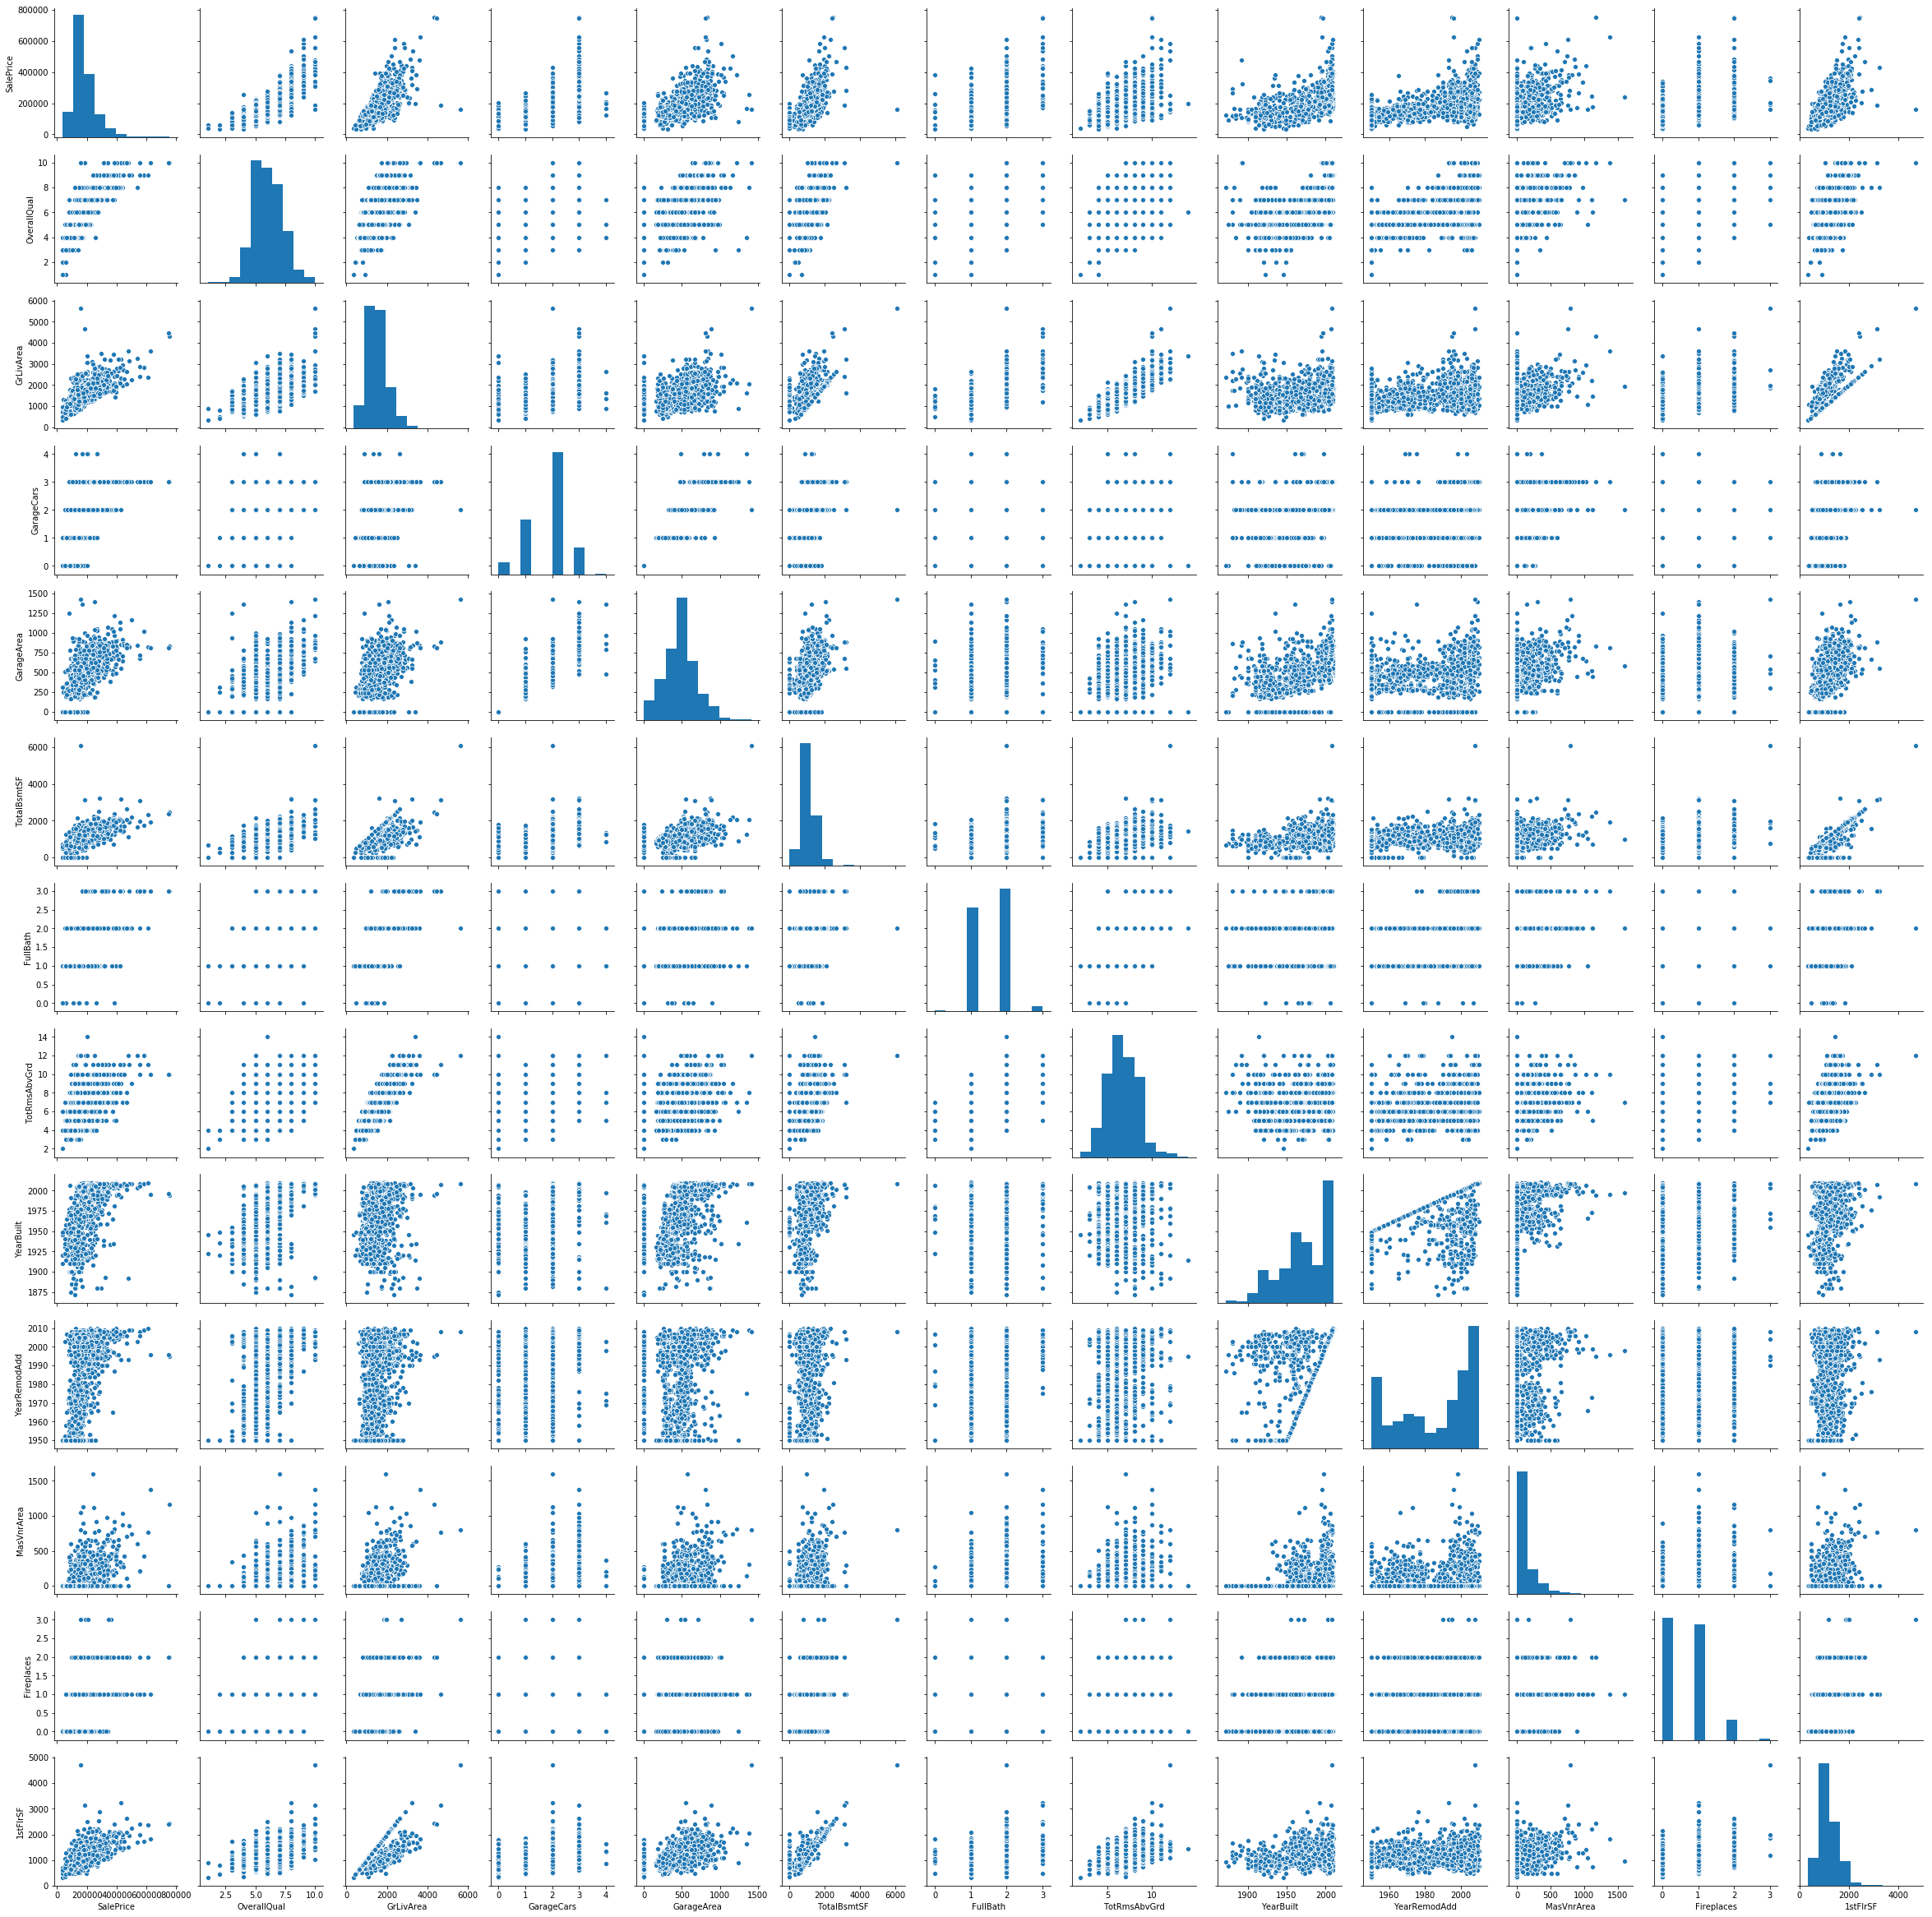

In [19]:
sns.pairplot(dt_copy[['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea','Fireplaces','1stFlrSF']])
py.show()

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


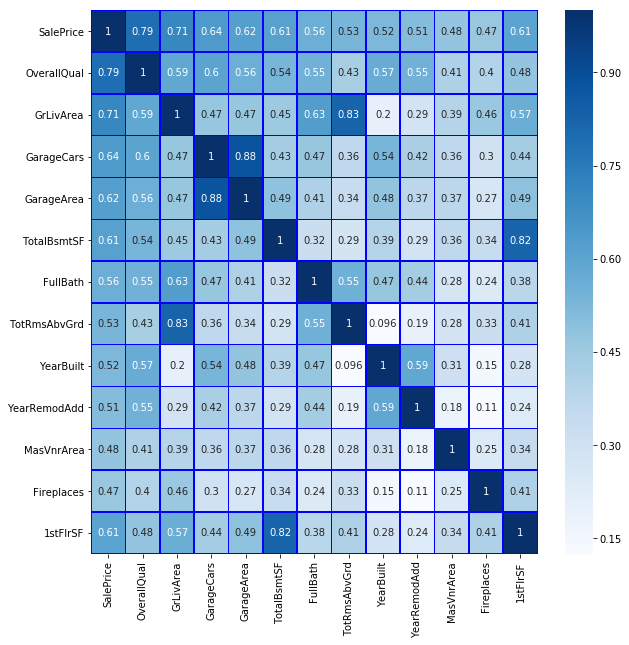

In [20]:
#Correlation top 10
dt_corr=dt_copy.corr()
dt_corr1=[]
dt_corr1=dt_corr.nlargest(10, 'SalePrice')['SalePrice'].abs()
print(dt_corr1)

displaycorr=dt_copy[['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea','Fireplaces','1stFlrSF']].corr()
py.figure(figsize=(10,10))
sns.heatmap(displaycorr,linewidth=0.5,cmap="Blues",annot=True,robust=True,linecolor="Blue")
py.show()

1. from the above observations, we can conclude that our dataset is not distrubuted symmetrically
2. let's find skewness of all numerical feature and those skewness is more than 0.75 , we will apply logarithmic function on it
3. after applying logsrithmic, now we need to convert all categorical features into numerical form.
4. but features and categories present in train and test dataset is different
5. so lets concat both the dataset
6. Apply get_dummies to convert catogerical to number form
7. then demerge it with lenght of training dataset
8. now we get our both dataset trainind and testing

In [21]:
class skew_dummies():
    
    def __init__(self):
        print("object has created")
        
    def apply_skew(self,data):
        col_number = data.select_dtypes(include=['number']).columns.tolist()
        #print(col_number)
        for col_transform in col_number:
            skewness = scipy.stats.skew(data[col_number])
        print(skewness)
        if skewness.all() > 0.75:
            data[col_number] = np.log1p(data[col_number])
        return data

    
    def create_dummy(self,train,test):
        train_objs_num = len(train)
        data = pd.concat(objs=[train, test], axis=0,ignore_index=True)
        data=pd.get_dummies(data,drop_first=True).astype('float')

        return data



In [22]:
train_objs_num = len(dt_copy)
train_objs_num

1460

In [23]:
dumm=skew_dummies()
dumm1=skew_dummies()
dt_copy=dumm.apply_skew(dt_copy)
dt_test=dumm1.apply_skew(dt_test)


data=dumm1.create_dummy(dt_copy,dt_test)

dt_copy = data[:train_objs_num]
dt_test =data[train_objs_num:]

object has created
object has created
[ 1.40621011  2.40667081 12.19514213  0.21672098  0.69235521 -0.61283072
 -0.5030445   2.67372335  1.6837709   4.25088802  0.9193227   1.52268809
  1.37534174  0.81219427  9.00208042  1.36515595  0.59545404  4.09918567
  0.03652398  0.67520283  0.21157244  4.48378409  0.67564577  0.64889763
 -0.3421969   0.17979594  1.5397917   2.36191193  3.08669647 10.29375236
  4.11797738 14.81313466 24.45163962  0.21183506  0.09616958  1.88094075]
[ 1.34381974  0.70961975  3.00830083  0.17922743  0.45229653 -0.58928121
 -0.3998423   2.54131417  1.1638245   4.03557458  0.91896625  0.821389
  1.42843103  0.9098949  16.13943902  1.08823518  0.64902901  3.77597374
  0.28983765  0.71503474  0.43138534  4.07158737  0.8374568   0.81910913
 -0.10640271  0.30007355  2.126972    2.6824535   4.66100138 12.5025964
  3.7812586  20.16218445 20.0407656   0.18222002  0.16942835]


In [24]:
print(dt_copy.shape)
print(dt_test.shape)

(1460, 235)
(1457, 235)


## Preprocessing & model building

1. now to train and apply ML algorithm on our dataset , let's split the datset
2. X variable contain the dataset on which we need to train the ML algo
3. Y variable contain the target
4. let's split datset into X_train,X_test,Y_train,Y_test

In [25]:
#split dataset
X=dt_copy.drop(['SalePrice'],axis=1)
Y=dt_copy['SalePrice']
dt_test.drop(['SalePrice'],axis=1,inplace=True)


X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=7,test_size=0.20)

1. TO evaluate the best algorithm for this dataset , lets try to apply all algorithm one by one
2. now we dont know anything about which is the best algorithm
3. lest create list of all algorithm 
4. apply KFold and cross_val_score and find out score of each 
5. and lets plot boxplot for each results

In [26]:
mllist=[]
mllist.append(('LR',LinearRegression()))
mllist.append(('LASSO',Lasso()))
mllist.append(('EN',ElasticNet()))
mllist.append(('KNN',KNeighborsRegressor()))
mllist.append(('CART',DecisionTreeRegressor()))
mllist.append(('SVR',SVR()))

LR -0.021941311851168342 0.012609979255185474
LASSO -0.1578004102490354 0.027448039116294305
EN -0.1578004102490354 0.027448039116294305
KNN -0.060940993992111926 0.008081592910762865
CART -0.048818528686271595 0.008673244381499908
SVR -0.021186863972930254 0.00855470747137724


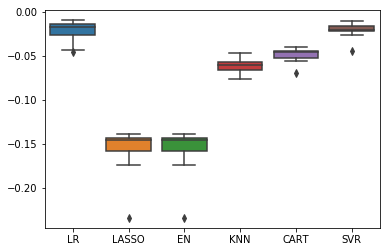

In [27]:
#check accuracy with default algo
#evaluate each module 
names=[]
score=[]
scoring='neg_mean_squared_error'
for name,model in mllist:
    kfolds=KFold(n_splits=10,random_state=7,)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfolds,scoring=scoring)
    score.append(cv_results)
    names.append(name)
    print(name, cv_results.mean() ,cv_results.std())
    
sns.boxplot(x=names,y=score)
py.show()

1. LR and SVR algorithm gives the best results by default but there are outliners in SVR results
2. to understand more about the results let's create pipeline with preprocessing data with Standard Scaler and applying ML algortihm on it.
3. Now we got the results, if we compare the results with earlier output of ML algo without applying Standard Scaler.
4. there is not much of difference in results 

scaledLR -1.1920598782285309e+22 3.539500442430476e+22
scaledLasso -0.1578004102490354 0.027448039116294305
scaledElast -0.1578004102490354 0.027448039116294305
scaledKNN -0.04222544956766878 0.009819133024801727
scaledCART -0.04934064197821427 0.016190038986755147
scaledSVR -0.034928548765334334 0.012544597339622468


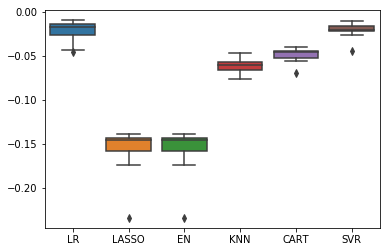

In [28]:
pipe=[]
names1=[]
score1=[]
pipe.append(('scaledLR',Pipeline([('scaler',StandardScaler()),('LR',LinearRegression())])))
pipe.append(('scaledLasso',Pipeline([('scaler',StandardScaler()),('Lasso',Lasso())])))
pipe.append(('scaledElast',Pipeline([('scaler',StandardScaler()),('Elast',ElasticNet())])))
pipe.append(('scaledKNN',Pipeline([('scaler',StandardScaler()),('KNN',KNeighborsRegressor())])))
pipe.append(('scaledCART',Pipeline([('scaler',StandardScaler()),('CART',DecisionTreeRegressor())])))
pipe.append(('scaledSVR',Pipeline([('scaler',StandardScaler()),('SVR',SVR())])))

scoring='neg_mean_squared_error'
for name,model in pipe:
    kfolds=KFold(n_splits=10,random_state=7,)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfolds,scoring=scoring)
    score1.append(cv_results)
    names1.append(name)
    print(name, cv_results.mean() ,cv_results.std())
    
sns.boxplot(x=names,y=score)
py.show()

1. Once we done with applying most commonly used algorthm , now its time to evaluate with Ensembles
2. we will apply sameprocesure which we did earlier, create pipeline with preprocessing data with Standard Scaler and create list of pipeline with Ensembles like AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor

ScaledAdaB -0.030531001883626903 0.007875780566912885
ScaledGB -0.018481191502992694 0.006466881140876375
ScaledRFR -0.025507178496366016 0.008196597813741708
ScaledETR -0.022891115378682984 0.005913591366747559


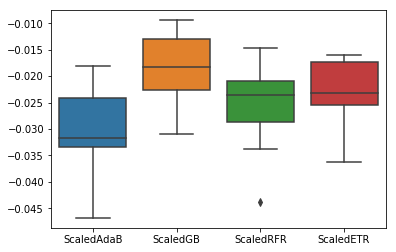

In [29]:
#Trying Esembles 
pipeEse=[]
pipeEse.append(('ScaledAdaB',Pipeline([('Scaler',StandardScaler()),('AdaB',AdaBoostRegressor())])))
pipeEse.append(('ScaledGB',Pipeline([('Scaler',StandardScaler()),('GB',GradientBoostingRegressor())])))
pipeEse.append(('ScaledRFR',Pipeline([('Scaler',StandardScaler()),('RFR',RandomForestRegressor())])))
pipeEse.append(('ScaledETR',Pipeline([('Scaler',StandardScaler()),('ETR',ExtraTreesRegressor())])))

names=[]
result=[]
for name,model in pipeEse:
    kfolds=KFold(n_splits=10,random_state=7,)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfolds,scoring=scoring)
    result.append(cv_results)
    names.append(name)
    print(name, cv_results.mean() ,cv_results.std())
    
sns.boxplot(x=names,y=result)
py.show()

1. From the results it's look like Gradient boosting showed least square error with minimun standard daviation
2. So let's select this algorithm for our model building and now we will hyper parameterize the Gradient boosting

3. For Tuning the Algortihm , we will used GridSearchCV method
4. we will create dictionary of require parameter which will effect on output.
5. in GradientBoosting , n_estimators is the main tuning part
6. After Tuning , we get result that with n_estimators 350 or 400  it gives the best result 

In [30]:
#tuning the Esembles for GradientBoosting

scaler=StandardScaler().fit(X_train)
trans=scaler.transform(X_train)
param_grid=dict(n_estimators=np.array([10,20,50,10,150,200,250,300,350,400,450,500]))
model=GradientBoostingRegressor(random_state=7)
kfolds=KFold(n_splits=10,random_state=7,)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfolds)
grid_result=grid.fit(trans,Y_train)
print(grid_result.best_score_,grid_result.best_params_)

-0.018047241796365528 {'n_estimators': 350}


1. Now let's create model and train our data on that model and predict the result
2. with GradientBoostingRegressor with n_estimators=400, we got almost 91% score for r2_score and 0.01 mean_squared_error.

In [31]:
scale=StandardScaler().fit(X_train)
tran=scale.transform(X_train)
model=GradientBoostingRegressor(random_state=7,n_estimators=400)
model.fit(tran,Y_train)

tran1=scale.transform(X_test)
predict1=model.predict(tran1)
print(mean_squared_error(Y_test,predict1))
print(r2_score(Y_test,predict1))

0.014119620698811583
0.915739465666914


In [32]:
# Final MOdel
class prediction():
    
    def __init__(self):
        print("Objects has created")
        
    def model(self,dt_test):
        '''This Method is evaluate use to predict the output of given data '''
        scale1=StandardScaler().fit(X_train)
        tran=scale.transform(X_train)
        model=GradientBoostingRegressor(random_state=7,n_estimators=400)
        model.fit(tran,Y_train)

        #tran1=scale.transform(X_test)
        tran2=scale.transform(dt_test)
        predict1=model.predict(tran2)
        predict1=np.expm1(predict1)
        test = pd.Series(predict1, name="sales Price")
        Submission = pd.concat([test_id,test],axis=1)
        return Submission

#print(mean_squared_error(Y_test,predict1))
#print(r2_score(Y_test,predict1))

Now Predict the Price of House on Test Dataset

In [33]:

pred=prediction()
result=pred.model(dt_test)
result

Objects has created


Id    sales Price
0     1461  126061.119245
1     1462  154831.046138
2     1463  185957.257914
3     1464  184108.773116
4     1465  180335.098302
5     1466  176203.343903
6     1467  171873.438100
7     1468  164888.071037
8     1469  178380.999636
9     1470  123757.678816
10    1471  202776.172875
11    1472   96821.325208
12    1473   95379.044315
13    1474  151084.376781
14    1475  127948.681635
15    1476  368798.732492
16    1477  257109.980045
17    1478  294438.015362
18    1479  287863.509998
19    1480  489970.960870
20    1481  353800.014557
21    1482  205977.834809
22    1483  170693.202208
23    1484  175446.505974
24    1485  170600.780065
25    1486  187800.568371
26    1487  364120.827271
27    1488  240227.022041
28    1489  207689.061636
29    1490  225180.280512
...    ...            ...
1429  2890   54797.312043
1430  2891  102238.737221
1431  2892   54425.506851
1432  2893  282141.036622
1433  2894  268847.454409
1434  2895  195480.027198
1435  2896  140935.753968
1436  2897  220568.504446
1437  2898  160107.221200
1438  2899  188731.074875
1439  2900  183816.315738
1440  2901  335458.781879
1441  2902  371802.960267
1442  2903   92900.427491
1443  2904  207754.468818
1444  2905  111572.396053
1445  2906  133214.562974
1446  2907  136397.906055
1447  2908   81338.992981
1448  2909   79773.432994
1449  2910  154974.327855
1450  2911   81897.874921
1451  2912   75195.073022
1452  2913   80039.094498
1453  2914   77662.955848
1454  2915  141945.736319
1455  2916  119273.700624
1456  2917  235682.683919
1457  2918            NaN
1458  2919            NaN

[1459 rows x 2 columns]